# Ecoulement avec saut de porosite en 1D

In [1]:
from trustutils import run

run.introduction("Y. Gorsse")
run.description("Ecoulement unidirectional, sans diffusion. Le domaine est 1D. On compare VDF, PolyMAC, CoviMAC à la solution qui satisfait la conservation de la charge")
run.TRUST_parameters()

## Introduction 
 Validation made by : Y. Gorsse



 Report generated 18/02/2022

### Description 
Ecoulement unidirectional, sans diffusion. Le domaine est 1D. On compare VDF, PolyMAC, CoviMAC à la solution qui satisfait la conservation de la charge

### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/Verification_codage/porosite_1D/build)

In [2]:
from trustutils import run
run.addCase("VDF" ,"jdd.data")
run.addCase("PolyMAC" ,"jdd.data")
run.addCase("CoviMAC" ,"jdd.data")


run.printCases()
run.runCases()

### Test cases 
* VDF/jdd.data : 
* PolyMAC/jdd.data : 
* CoviMAC/jdd.data : 


Running ...
  => A total of 3 cases were (successfully) run in 0.8s.


## Residuals

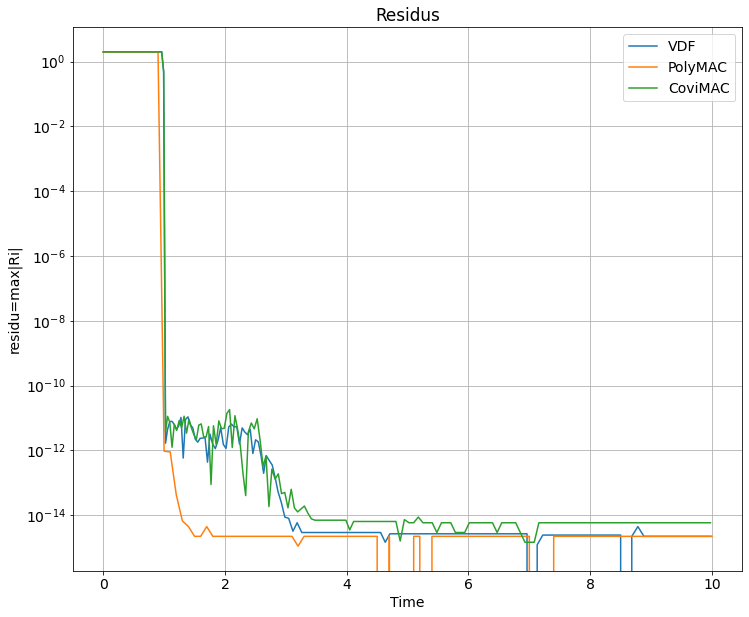

In [3]:
from trustutils import plot

a=plot.Graph("Residus")
a.addResidu("VDF/jdd.dt_ev",label="VDF")
a.addResidu("PolyMAC/jdd.dt_ev",label="PolyMAC")
a.addResidu("CoviMAC/jdd.dt_ev",label="CoviMAC")

a.scale(yscale='log')
a.visu()


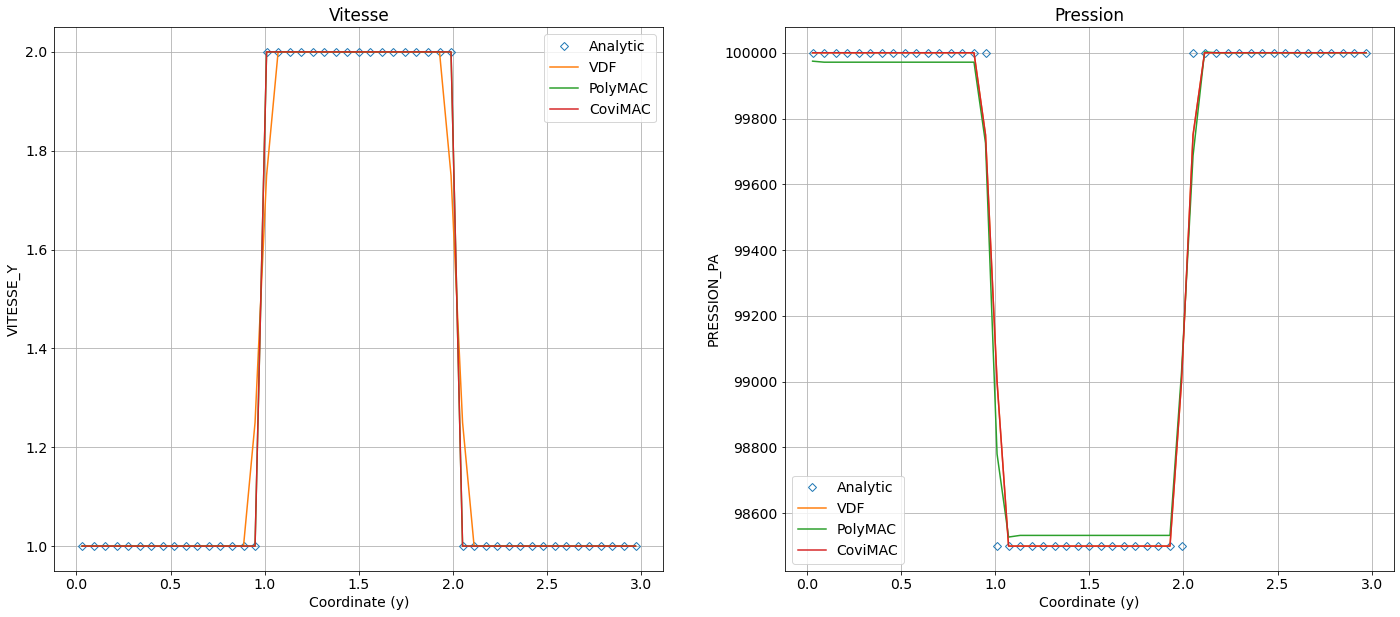

In [4]:
a=plot.Graph("Vitesse",nY=2)
a.addSegment("VDF/jdd_V_EX.son",label="Analytic",compo=1,marker='D',markerfacecolor='none')
a.addSegment("VDF/jdd_V.son",label="VDF",compo=1)
a.addSegment("PolyMAC/jdd_V.son",label="PolyMAC",compo=1)
a.addSegment("CoviMAC/jdd_V.son",label="CoviMAC",compo=1)

a.addPlot(1,"Pression")
a.addSegment("VDF/jdd_P_EX.son",label="Analytic",marker='D',markerfacecolor='none')
a.addSegment("VDF/jdd_P.son",label="VDF")
a.addSegment("PolyMAC/jdd_P.son",label="PolyMAC")
a.addSegment("CoviMAC/jdd_P.son",label="CoviMAC")

a.visu()